In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time

In [22]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Problem statement: we want to be able to predict whether a patient is at risk of getting heart disease 

In [23]:
df_not = df[df['target']==1]
df_yes = df[df['target']==0]
df_yes.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


We select cholestrol level and blood pressure as our first set of independent variables since these two factors are the usual prime suspects behind heart disease

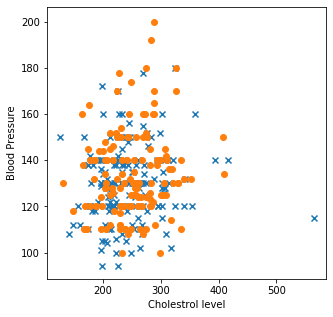

In [134]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df_not['chol'],df_not['trestbps'],marker='x')
ax.scatter(df_yes['chol'],df_yes['trestbps'],marker='o')
ax.set(xlabel='Cholestrol level', ylabel='Blood Pressure')
plt.show()

The scatter plot of the cholestrol level/blood pressure features suggests the hyperplane may not be that clear. We continue with this test but do not expect a high accuracy score for this model.

In [184]:
from sklearn.model_selection import train_test_split

X=df[['chol','trestbps']]
y=df['target']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [186]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.07346558570861816


In [187]:
y_pred=svClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5394736842105263

The accuracy score of cholestrol/blood pressure features is only 54%. 

We try to perform some feature engineering here to pick the best features that would increase the accuracy score.

In [160]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Based on the features correlation table above, thalach (maximum heart rate) and oldpeak (ST Depression:heart readings after excercise - higher score means higher risk). So we select these two features to test next.

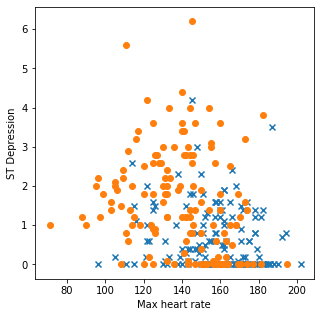

In [189]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df_not['thalach'],df_not['oldpeak'],marker='x')
ax.scatter(df_yes['thalach'],df_yes['oldpeak'],marker='o')
ax.set(xlabel='Max heart rate', ylabel='ST Depression')
plt.show()

In [196]:
from sklearn.model_selection import train_test_split

X=df[['thalach','oldpeak']]
y=df['target']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [198]:
from sklearn.svm import SVC

start=time.time()
svClassifier = SVC(kernel='poly',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.015588521957397461


In [199]:
y_pred=svClassifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7894736842105263

We have improved the accuracy score from 53% to 79% without increasing training-duration by selecting features based on the correlation factors. We next consider a multiple features to the model and test the impact on training-duration.

We add a 3rd feature (cp:chest pain) to our previous model. We choose cp because it has a relatively high correlation factor of 0.43 with target.

In [201]:
from sklearn.model_selection import train_test_split

X=df[['thalach','oldpeak','cp']]
y=df['target']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
from sklearn.svm import SVC

start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.015595674514770508


In [204]:
y_pred=svClassifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8157894736842105

We improved accuracy score from 78.9% to 81.5%, while training-duration stayed the same.

We now try adding a fourth feature, called exang. Exang basically measures whether excercise causes angina.

In [210]:
from sklearn.model_selection import train_test_split

X=df[['thalach','oldpeak','cp','exang']]
y=df['target']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [215]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.015580415725708008


In [216]:
y_pred=svClassifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868421052631579

We have improved accuracy score from 81.5% to 86.8%, while training duration stayed the same.

Further test below shows that adding a 5th feature does not improve accuracy score, so we conclude the model with 4 features is the optimal model for predicting heart disease in a patient.

We will fine-tune the 4-feature model by lowering C from its default setting (10) to 0.1. This raises our final accuracy score of the SVM model from 86.8% to 88.2%.

In [ ]:
def svmScore(c = 1, gam = 'scale', ker ='rbf'):
    svMachine = SVC(C = c, kernel = ker, gamma = gam)
    svMachine.fit(X_train, y_train)
    y_pred = svMachine.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [150]:
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    svmScore(ker = k)

0.868421052631579
0.7105263157894737
0.7763157894736842


In [151]:
svmScore(c = 0.1, ker = 'linear')
svmScore(c = 10, ker = 'linear')
svmScore(c = 100, ker = 'linear')

0.881578947368421
0.868421052631579
0.8552631578947368


Appendix: Test addition of 5th feature

In [218]:
from sklearn.model_selection import train_test_split

X=df[['thalach','oldpeak','cp','exang','ca']]
y=df['target']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [220]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.015619277954101562


In [221]:
y_pred=svClassifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868421052631579

In [223]:
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    svmScore(ker = k)

0.868421052631579
0.7105263157894737
0.7763157894736842
